# Scattering by two GNP in random orientations using MSTM
## Evaluate the total scattreing properties

## Load modules 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
%matplotlib inline

## Output of MSTM 

There are options to output the scattreing properties for each sphere or the total properties. 

- The extinction, scattering, and absorption efficiencies for each of the sphere surface are outputed
- The total extinction, scattering, and absorption efficiencies of the target, for unpolarized incident
radiation and defined with respect to the volume–mean radius, and the asymmetry parameter.

**Previous study analyze the properties for one sphere surface. Here we looked at the total properties.**

### Two spheres far away from each other
**We have studied the Q for two spheres far away from each other, and their scattering properties can directly related to independent scattering of one sphere**

The total scattering cross section of two spheres which are far apart should
be twice of the cross section for one sphere, $C_{scat,2}=2*C_{scat,1}$. 
The total volume of two sphere system would be $V=2\times\frac{4\pi}{3}r^3$,
and the mean radius would be $V=\frac{4\pi}{3}r_m^3$, therefore, $r_m=r\times 2^{1/3}$.
Therefore the total efficiency would be $Q_{scat,2}=C_{scat,2}/(\pi r_m^2)=2\times C_{scat,1}/(\pi r^2 2^{2/3})=2^{1/3}C_{scat,1}/(\pi r^2)=2^{1/3} Q_{scat,1} $. While $2^{1/3}=1.26, the two sphere total efficiency would be 1.26 times of the one sphere effiency. 

For a general N sphere system $V=N\times\frac{4\pi}{3}r^3=\frac{4\pi}{3}r_m^3$, and $r_m=r \times N^{1/3}$. $Q_{scat,N}=C_{scat,N}/(\pi r_m^2)=N\times C_{scat,1}/(\pi r^2 N^{2/3})=N^{1/3}C_{scat,1}/(\pi r^2)=N^{1/3} Q_{scat,1} $

## Two spheres in random orientation

In [2]:
#read data of wavelength, n, k, x1, xn, xd
[nv2, kv2, wv2, dv2, nkd]=pickle.load(open("../data/gold_nk.pkl", "rb" ))
nkd.shape

## single sphere
[nv2, kv2, wv2, dv2, datav]=pickle.load(open("../data/gold_mie.pkl", "rb" ))
[qextv,qscav, qabsv, qbackv,gv]=datav

In [3]:
def compare_mie(qextv, qextv2, wv2, dv2, ylabel, scale='log',title1='One sphere', title2='Two spheres', title3='Two/One'):
    num_plots=len(dv2)
    nd=len(dv2)
    
    colormap = plt.cm.gist_ncar
    plt.figure(figsize=(9,3))
    
    ax=plt.subplot(131)
    ax.set_yscale(scale)
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

    plt.plot(wv2,qextv)
    plt.ylabel(ylabel)
    plt.xlabel("Wavelength(nm)")
    plt.title(title1)
    
    ax=plt.subplot(132)
    ax.set_yscale(scale)
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

    plt.plot(wv2,qextv2)
    plt.xlabel("Wavelength(nm)")
    plt.title(title2)
    
    plt.subplot(133)
    #ax.set_yscale(scale)
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

    plt.plot(wv2,qextv2/qextv)
    #for j in range(nd):
    #    tmp=plt.plot(wv2,(qextv-qextv2)[:,j], label=str(dv2[j])+'nm')

    plt.title(title3)
    plt.xlabel("Wavelength(nm)")
    #plt.legend(bbox_to_anchor=(1.3,1.2),title="Diameter")
        
    #plt.plot(wv2,qextv2)
    plt.tight_layout()

The first test results in wrong dimension of particle radius. After correct the script with the last radius size extended by half step size. All is good

### sphere center distance=2*radius (two spheres touch)

(-3, 3)

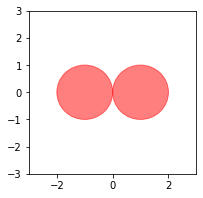

In [4]:
fig=plt.figure(figsize=(3,3))
ax = plt.subplot(111) # note we must use plt.subplots, not plt.subplot


circle1 = plt.Circle((1, 0), 1, color='r',clip_on=False, alpha=0.5)
circle2 = plt.Circle((-1, 0), 1, color='r',clip_on=False, alpha=0.5)

# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

ax.add_artist(circle1)
ax.add_artist(circle2)
plt.xlim(-3,3)
plt.ylim(-3,3)
#fig.savefig('plotcircles.png')

In [10]:
pd1=pd.read_csv("../data/t02_2pd1_total.summary",delim_whitespace=True)
pd1=pd1.loc[(pd1['unpolarized']!='--') & (pd1['unpolarized']!='unpolarized')]
#unpolarized total ext, abs, scat efficiencies, w.r.t. xv, and asym. parm
pd1=pd.DataFrame(pd1.values.astype('float')[:,:4],columns=("Qext", "Qabs", "Qsca","Asymmetry"))

nwv=len(nkd)
qextv2=pd1['Qext'].values.reshape(nwv, -1)
qscav2=pd1['Qsca'].values.reshape(nwv, -1)
qabsv2=pd1['Qabs'].values.reshape(nwv, -1)
qg2=pd1['Asymmetry'].values.reshape(nwv, -1)

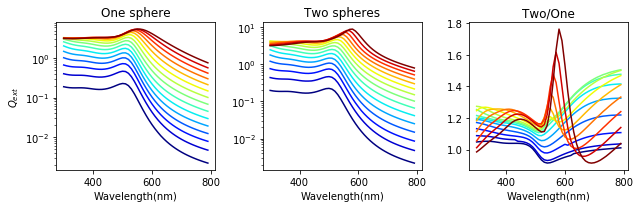

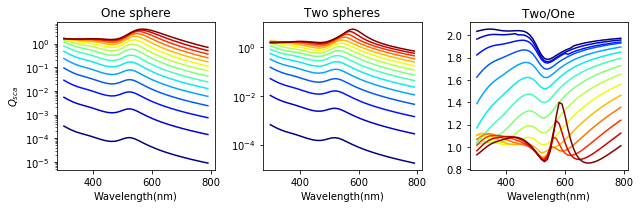

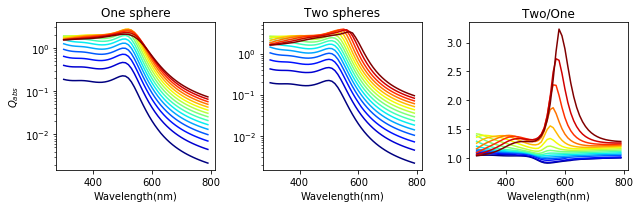

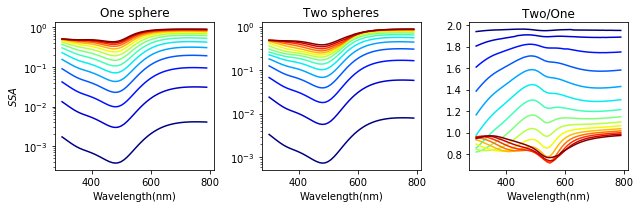

In [6]:
#plot q in log scale
compare_mie(qextv,qextv2, wv2,dv2, ylabel="$Q_{ext}$")
compare_mie(qscav,qscav2, wv2,dv2, ylabel="$Q_{sca}$")
compare_mie(qabsv,qabsv2, wv2,dv2, ylabel="$Q_{abs}$")
compare_mie(qscav/qextv,qscav2/qextv2, wv2,dv2, ylabel="$SSA$")

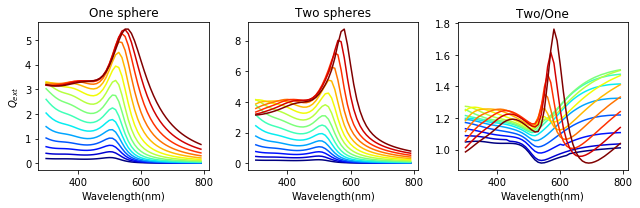

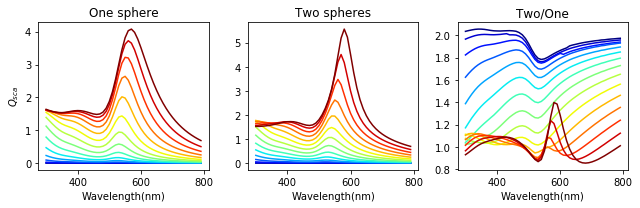

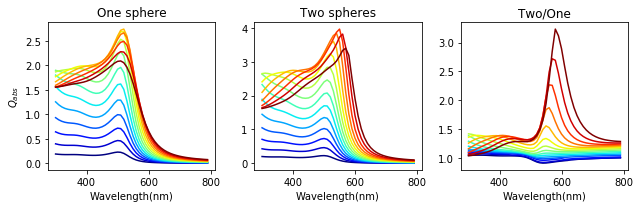

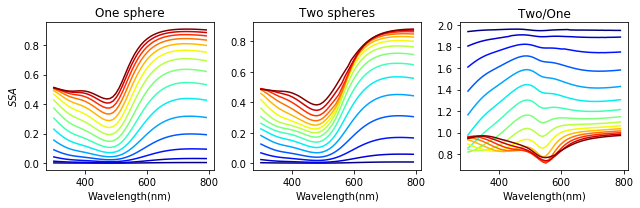

In [7]:
#plot q in log scale
compare_mie(qextv,qextv2, wv2,dv2, ylabel="$Q_{ext}$",scale='linear')
compare_mie(qscav,qscav2, wv2,dv2, ylabel="$Q_{sca}$",scale='linear')
compare_mie(qabsv,qabsv2, wv2,dv2, ylabel="$Q_{abs}$",scale='linear')
compare_mie(qscav/qextv,qscav2/qextv2, wv2,dv2, ylabel="$SSA$",scale='linear')

### sphere center distance=4*radius=2*diameter (two spheres not touch)

(-3, 3)

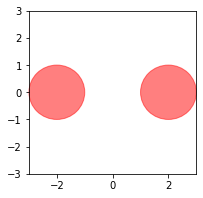

In [11]:
fig=plt.figure(figsize=(3,3))
ax = plt.subplot(111) # note we must use plt.subplots, not plt.subplot


circle1 = plt.Circle((2, 0), 1, color='r',clip_on=False, alpha=0.5)
circle2 = plt.Circle((-2, 0), 1, color='r',clip_on=False, alpha=0.5)

# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

ax.add_artist(circle1)
ax.add_artist(circle2)
plt.xlim(-3,3)
plt.ylim(-3,3)
#fig.savefig('plotcircles.png')

In [12]:
pd1=pd.read_csv("../data/t02_2pd2_total.summary",delim_whitespace=True)
pd1=pd1.loc[(pd1['unpolarized']!='--') & (pd1['unpolarized']!='unpolarized')]
#unpolarized total ext, abs, scat efficiencies, w.r.t. xv, and asym. parm
pd1=pd.DataFrame(pd1.values.astype('float')[:,:4],columns=("Qext", "Qabs", "Qsca","Asymmetry"))

nwv=len(nkd)
qextv3=pd1['Qext'].values.reshape(nwv, -1)
qscav3=pd1['Qsca'].values.reshape(nwv, -1)
qabsv3=pd1['Qabs'].values.reshape(nwv, -1)
qg3=pd1['Asymmetry'].values.reshape(nwv, -1)

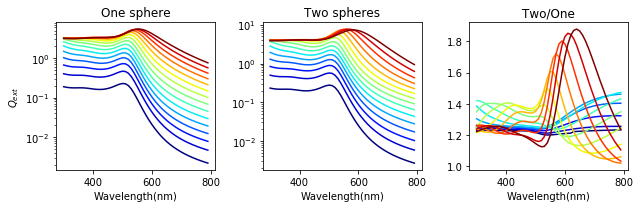

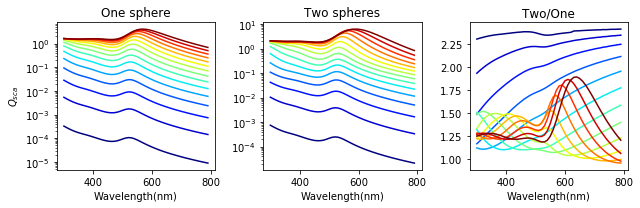

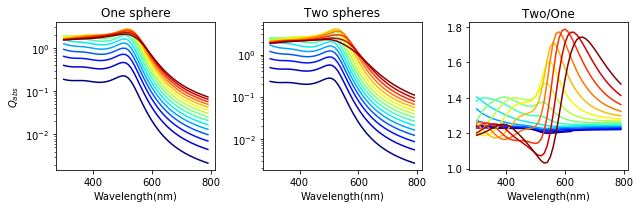

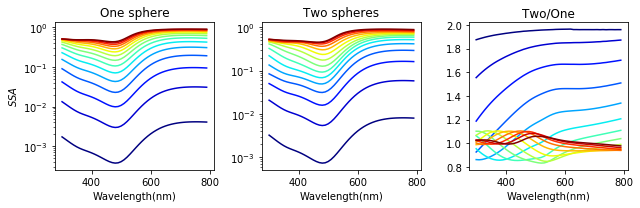

In [13]:
#plot q in log scale
compare_mie(qextv,qextv3, wv2,dv2, ylabel="$Q_{ext}$")
compare_mie(qscav,qscav3, wv2,dv2, ylabel="$Q_{sca}$")
compare_mie(qabsv,qabsv3, wv2,dv2, ylabel="$Q_{abs}$")
compare_mie(qscav/qextv,qscav3/qextv3, wv2,dv2, ylabel="$SSA$")

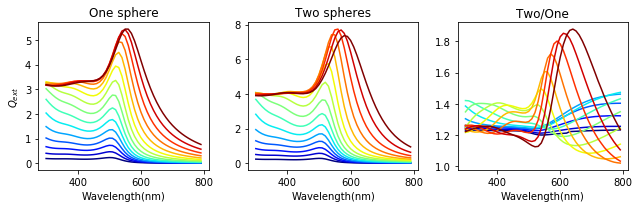

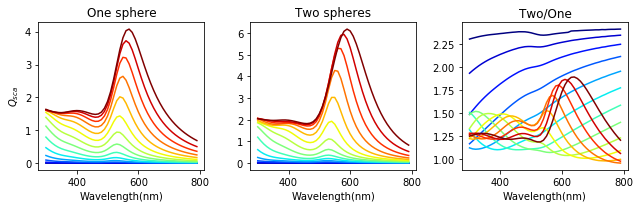

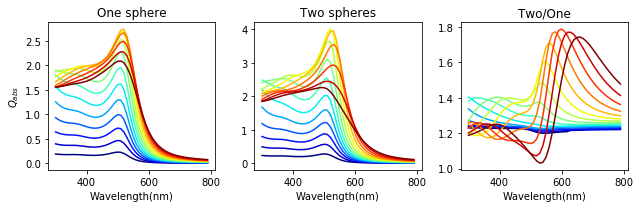

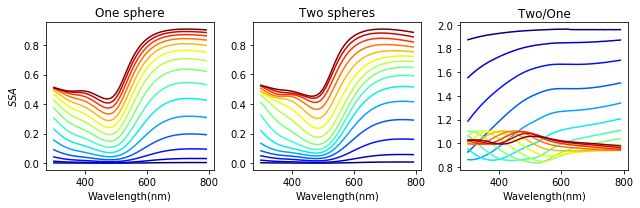

In [14]:
#plot q in linear scale
compare_mie(qextv,qextv3, wv2,dv2, ylabel="$Q_{ext}$",scale='linear')
compare_mie(qscav,qscav3, wv2,dv2, ylabel="$Q_{sca}$",scale='linear')
compare_mie(qabsv,qabsv3, wv2,dv2, ylabel="$Q_{abs}$",scale='linear')
compare_mie(qscav/qextv,qscav3/qextv3, wv2,dv2, ylabel="$SSA$",scale='linear')

### sphere center distance=100*radius=50*diameter (two spheres are far)

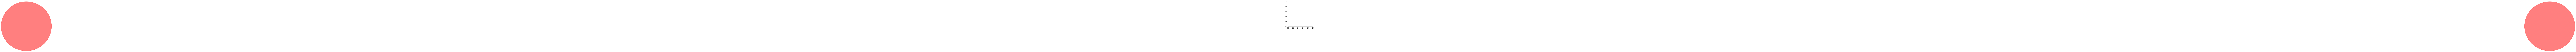

In [15]:
fig=plt.figure(figsize=(3,3))
ax = plt.subplot(111) # note we must use plt.subplots, not plt.subplot


circle1 = plt.Circle((50, 0), 1, color='r',clip_on=False, alpha=0.5)
circle2 = plt.Circle((-50, 0), 1, color='r',clip_on=False, alpha=0.5)

# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

ax.add_artist(circle1)
ax.add_artist(circle2)
#plt.xlim(-50,50)
#plt.ylim(-3,3)
#fig.savefig('plotcircles.png')

In [16]:
pd1=pd.read_csv("../data/t02_2pd50_total.summary",delim_whitespace=True)
pd1=pd1.loc[(pd1['unpolarized']!='--') & (pd1['unpolarized']!='unpolarized')]
#unpolarized total ext, abs, scat efficiencies, w.r.t. xv, and asym. parm
pd1=pd.DataFrame(pd1.values.astype('float')[:,:4],columns=("Qext", "Qabs", "Qsca","Asymmetry"))

nwv=len(nkd)
qextv4=pd1['Qext'].values.reshape(nwv, -1)
qscav4=pd1['Qsca'].values.reshape(nwv, -1)
qabsv4=pd1['Qabs'].values.reshape(nwv, -1)
qg4=pd1['Asymmetry'].values.reshape(nwv, -1)

In [17]:
2**(1/3)

1.2599210498948732

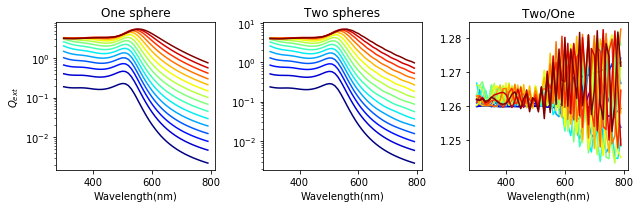

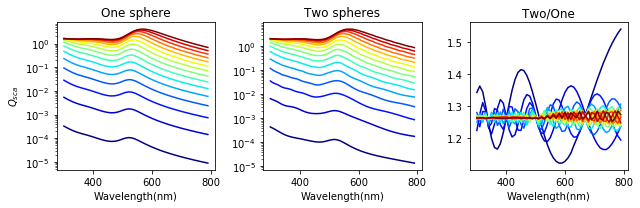

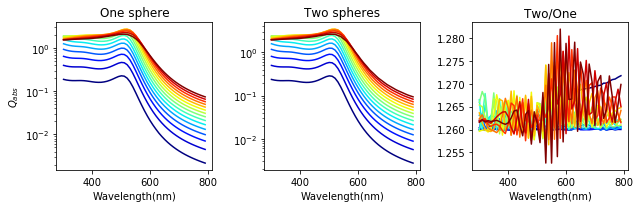

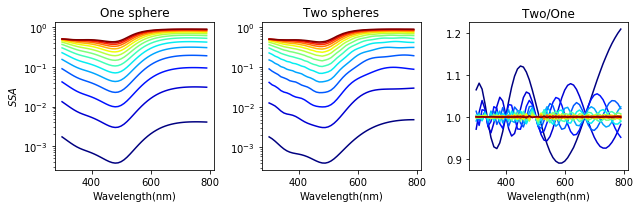

In [18]:
compare_mie(qextv,qextv4, wv2,dv2, ylabel="$Q_{ext}$")
compare_mie(qscav,qscav4, wv2,dv2, ylabel="$Q_{sca}$")
compare_mie(qabsv,qabsv4, wv2,dv2, ylabel="$Q_{abs}$")
compare_mie(qscav/qextv,qscav4/qextv4, wv2,dv2, ylabel="$SSA$")

### Compare results with center distance of 4*r and 2*r

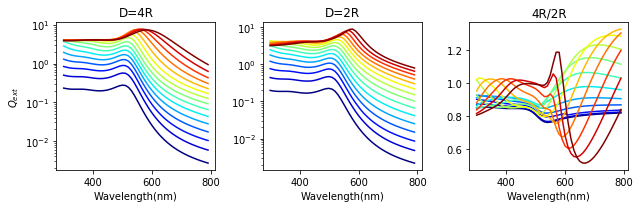

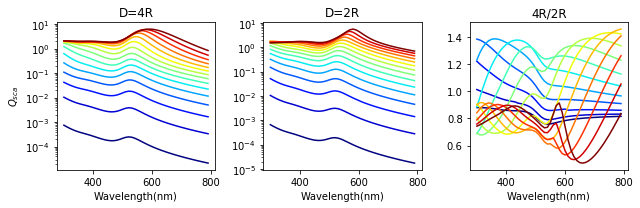

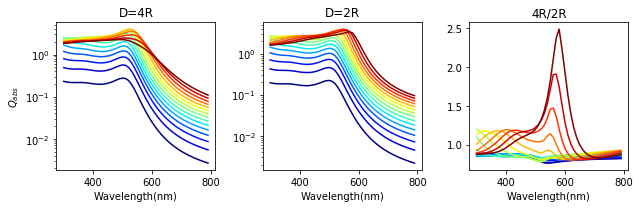

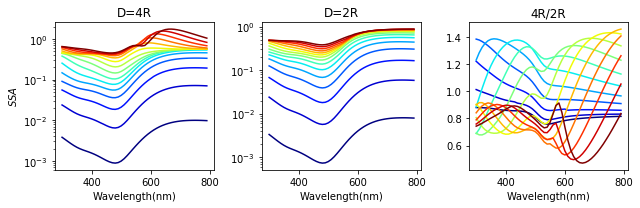

In [146]:
title1='D=4R'
title2='D=2R'
title3='4R/2R'
compare_mie(qextv3,qextv2, wv2,dv2, ylabel="$Q_{ext}$",title1=title1, title2=title2, title3=title3)
compare_mie(qscav3,qscav2, wv2,dv2, ylabel="$Q_{sca}$",title1=title1, title2=title2, title3=title3)
compare_mie(qabsv3,qabsv2, wv2,dv2, ylabel="$Q_{abs}$",title1=title1, title2=title2, title3=title3)
compare_mie(qscav3/qextv2,qscav2/qextv2, wv2,dv2, ylabel="$SSA$",title1=title1, title2=title2, title3=title3)

### compare 2r and 100r

In [37]:
def plot_2p(wv2, qextv,qextv2, scale='linear',label1='2GNP distance: 100r', label2='2GNP distance: 2r', idvv=[0,1,2,3],figsize=(6,9)):
    n1=len(idvv)
    plt.figure(figsize=figsize)
    for j,idv in enumerate(idvv):
        
        ax=plt.subplot(n1,1, j+1)
        ax.set_yscale(scale)
        plt.plot(wv2,qextv[:,idv],label=label1)
        plt.plot(wv2,qextv2[:,idv],label=label2)
        plt.title("Diameter(nm)(GNP:%3.2f)"%(dv2[idv]))
        plt.xlabel("Wavelength(nm)")
        plt.ylabel("$Q_{ext}$")
        plt.legend(bbox_to_anchor=(1.0,1.0))
    plt.tight_layout()

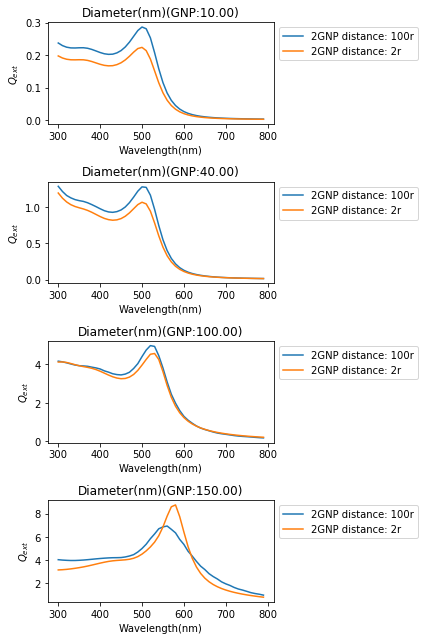

In [38]:
plot_2p(wv2, qextv4,qextv2, idvv=[0,3,9,14])

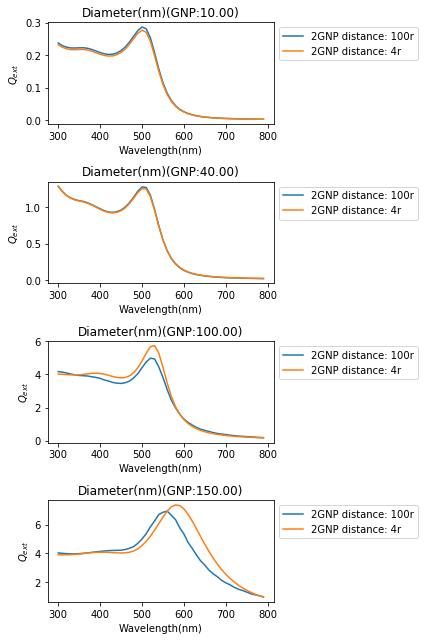

In [34]:
plot_2p(wv2, qextv4,qextv3, idvv=[0,3,9,14],label2='2GNP distance: 4r')

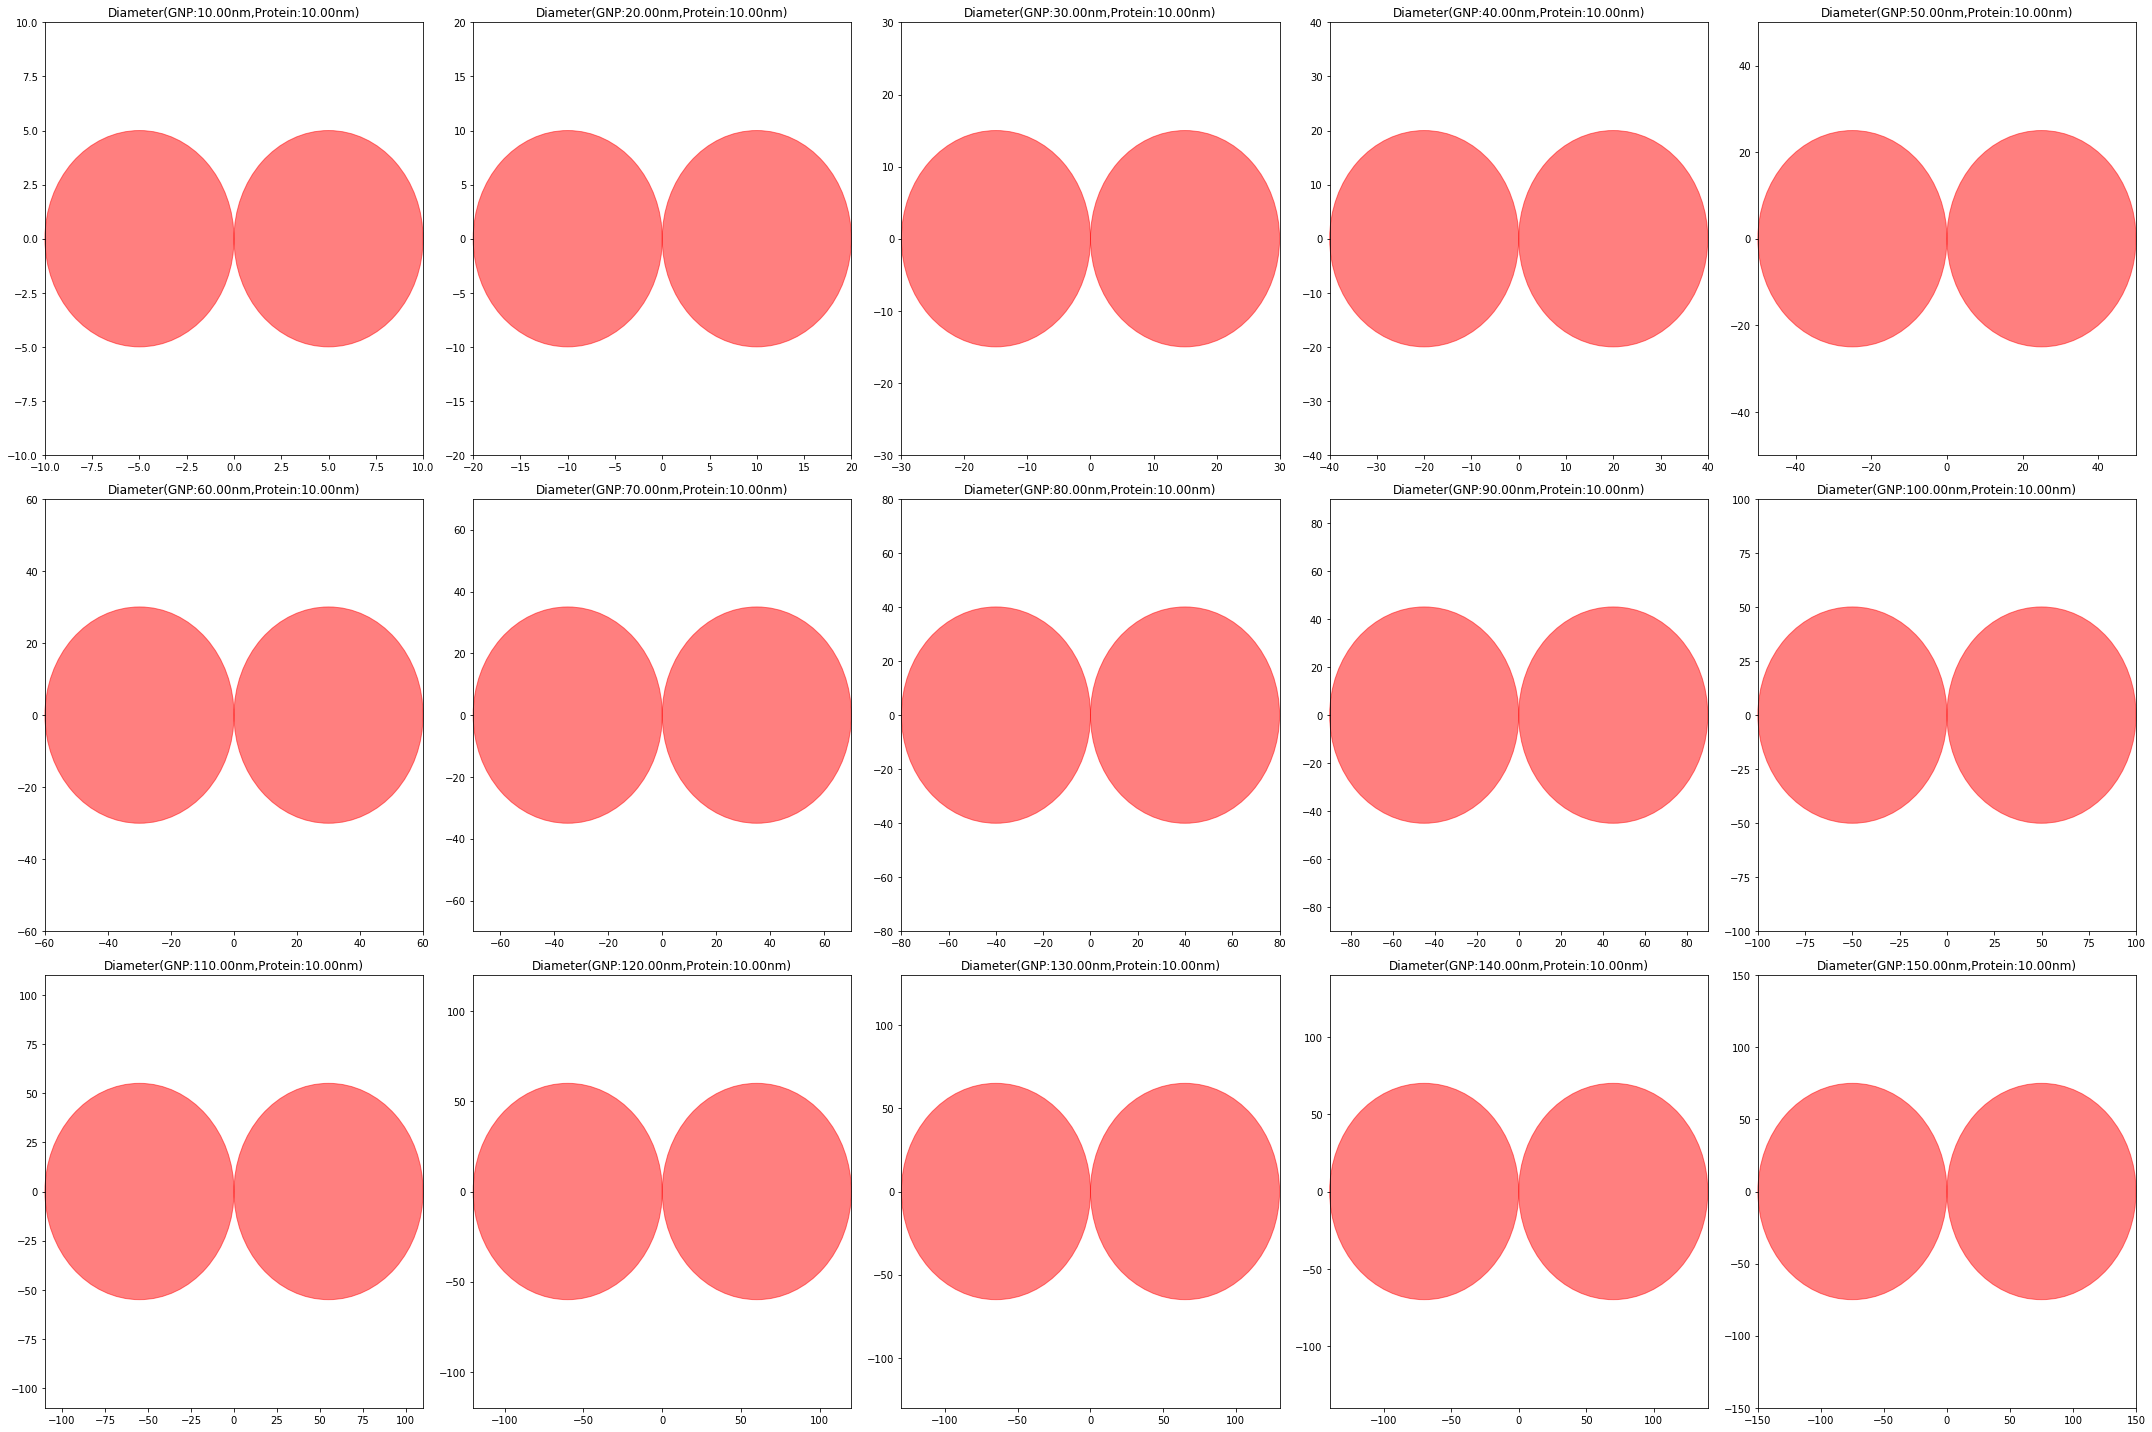

In [31]:
def plot_gnp(ax,r1,r2,dr=0):
    circle1 = plt.Circle((r1, 0), r1, color='r',clip_on=False, alpha=0.5)
    circle2 = plt.Circle((-r2, 0), r2+dr, color='r',clip_on=False, alpha=0.5)

    # (or if you have an existing figure)
    # fig = plt.gcf()
    # ax = fig.gca()

    ax.add_artist(circle1)
    ax.add_artist(circle2)
    
fig=plt.figure(figsize=(30,20))

for idv in range(15):
    #ax = plt.subplot(1,len(dv2),idv+1) # note we must use plt.subplots, not plt.subplot
    #ax=fig.add_subplot(1,len(dv2),idv+1)
    ax=fig.add_subplot(3,5,idv+1)
    r1=dv2[idv]/2
    r2=10/2
    plot_gnp(ax,r1,r1)
    x1=r1*2
    plt.xlim(-x1,x1)
    plt.ylim(-x1,x1)
    plt.title("Diameter(GNP:%3.2fnm,Protein:%3.2fnm)"%(dv2[idv],10))
plt.tight_layout()
#fig.savefig('plotcircles.png')